In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accient-analysis')
jovian.set_colab_id('1ssCBrIVtasszgXVImE8wxtKvvaA6PS6u')

     |████████████████████████████████| 68 kB 4.1 MB/s 


# US Accidents Exploratory Data Analysis

TODO - talk about EDA

TODO - talk about the dataset (source, 
what it contains, how it will be useful)
   - Kaggle
   - Information about accidents
   - can be useful to prevent accidents
   - This doesn't contain data about NY.

In [ ]:
#Importing needed libraries
import pandas as pd
import seaborn as sns
  #opdendatasets is used to import data from kaggle without need to download it
import opendatasets as od
  #folium makes it easy to visualize data that's been manipulated in Python on an interactive leaflet map
import folium
from folium.plugins import HeatMap

## Download The Data

In [ ]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing our datasets by opendatasets by jovain tool from github
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omarkorim
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 126MB/s]

In [ ]:
data_filename='./us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning
   1. Load the file using Pandas
   2. Look about some information about the data & the columns
   3. Fix any missing or incorrect values

In [ ]:
df=pd.read_csv(data_filename)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
#Getting the number of numeric columns in our data
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
#Getting the percentage of sum of the null value in each column
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)

#Keep only the values that have null values
missing_percentages[missing_percentages !=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

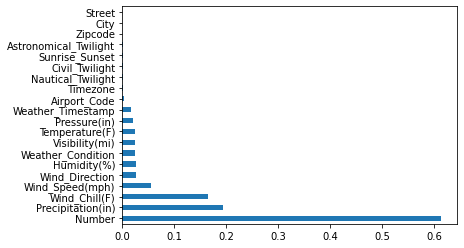

In [ ]:
#Plot The percentage of missing values to each column
missing_percentages[missing_percentages !=0].plot(kind='barh')

I think to need for column number cause it is have alot of missing values.

## Exploratory Analysis and Visulization

Columns we'll analyze:

1.City

2.Start Time

3.Start lat, Start lang

4.Temperature

5.Weather Condition

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
#Number of unique cities in usa
cities=df.City.unique()
len(cities)

11682

In [ ]:
#Count of accident in each city
cities_by_acciendt=df.City.value_counts()
cities_by_acciendt

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
#Top 20 city that have accidents
cities_by_acciendt[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

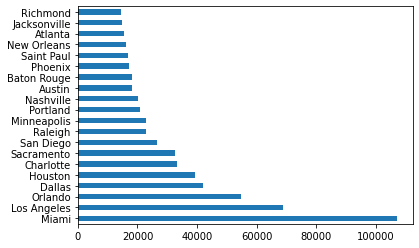

In [ ]:
#Plotting top 20 cities that have accidents
cities_by_acciendt[:20].plot(kind='barh')

It seems that miami have the largest amount of accidents

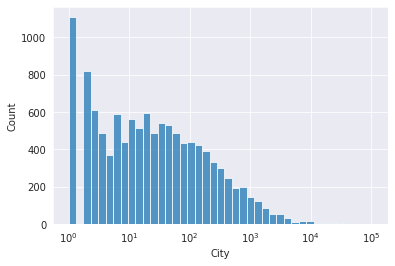

In [ ]:
#plotting the Count of cities that have the same number of accident
sns.set_style("darkgrid")
sns.histplot(cities_by_acciendt, log_scale=True)

The number of cities which has 1 accident is the largest one,
but maybe that is not accurate, Maybe it is just missing data to those cities

In [ ]:
cities_by_acciendt[cities_by_acciendt==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [ ]:
#Convert start time to datetime format
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


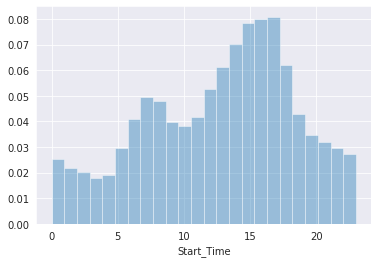

In [ ]:
#Plotting accident within the hours in the day
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- Accident start to increase from 12 PM to 5 PM

- It seems alittle bit wired 

- In this time people strat to go home from there work and they do not need to be in hurry

- It is not the morning while peole go thier work and not in the night when peole be tired (maybe something in the data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


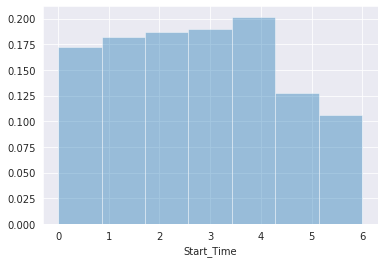

In [ ]:
#Plotting accident within days of week
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

- That is an accurate visualization, Because it is normal that most of the accidents happens during the weekdays and it is decrease in the weekend

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


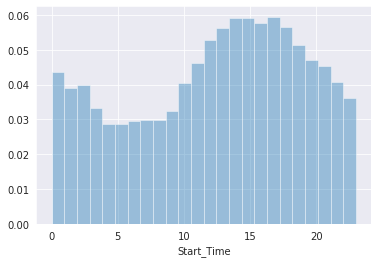

In [ ]:
#Plotting accident within sundays
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


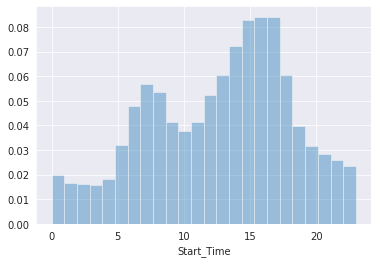

In [ ]:
#Plotting accident within the mondays
mondays_strat_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(mondays_strat_time.dt.hour, bins=24, kde=False, norm_hist=True)

- In Sundays the accidents is high in all over the day especially between 10 AM to 5 PM

- In Mondays only increase from 12 Pm to 5 PM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


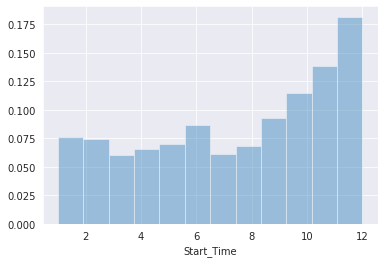

In [ ]:
#Plotting accident within the Months
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

- Accidents start to increase from septemper to december
- Accidents is more in winter than summer

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


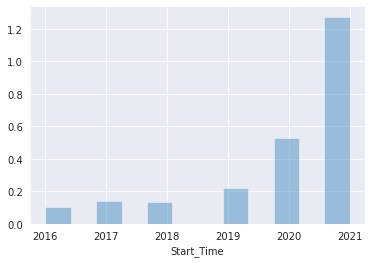

In [ ]:
#Plotting accident within year 
sns.distplot(df.Start_Time.dt.year, bins=12, kde=False, norm_hist=True)

- The accidents increased through the past few years, But can't consider this as an accurate analysis, Because maybe there is no enough data for the other years

Start Latitude & Longitude

In [ ]:
#Create a sample from our data to make the plotting more fast
sample_df=df.sample(int(0.01 * len(df)))

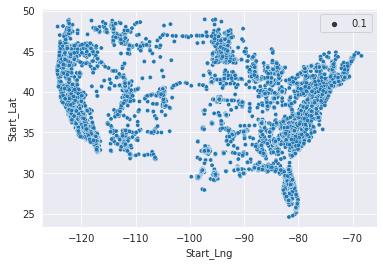

In [ ]:
#Plotting the location of each accidents
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat,size=0.1)

In [ ]:
#Create a pairs list consist of lat and len of every accidents
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
#Plot in heat map
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask and Answer Questions

1. Does the weather condition affect the accidents number?

2. Does traffic increase the accidents?

3. When is accidents per unit of traffic the highest.

4. are there more accidnts in warmer or colder area?

5. Which 5 state had the highest number of accidents?

6. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
   
7. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
  
8. What time of the day are accidents most frequent in? - ANSWERED
    
9. Which days of the week have the most accidents?
    
10. Which months have the most accidents?

11. What is the trend of accidents year over year (decreasing/increasing?)
   




## Summary and Conclusion

Insights:

- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)
- Not enough data for traffic.
- There is something wrong in data in the week days the accidents increased in the middle of the day and that is wired.
- The accidents increase only from sep to december not the rest of the winter.
- This data contain only a full data about 2021, Other years not we have less data.
- In Sundays the accidents is high in all over the day especially between 10 AM to 5 PM
- In Mondays only increase from 12 Pm to 5 PM
